In [ ]:
# save activations and derivatives
# Implement backpropagation
# implement gradient descent
# implement train
# train our net with dummy dataset
# make some predictions

In [45]:
import numpy as np
class MLP:
    """A Multilayer Perceptron class
    """
    def __init__(self,num_inputs=3,num_hidden=[3,3],num_outputs=2):
        
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        
        layers = [self.num_inputs]+self.num_hidden+[self.num_outputs]
        
        #random weights
        weights = []
        for i in range(len(layers)-1):
            w  = np.random.rand(layers[i],layers[i+1])
            #weights[i] = w 
            weights.append(w)
        self.weights = weights
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations
        
        derivatives = []
        for i in range(len(layers)-1):
            d = np.zeros((layers[i],layers[i+1]))
            derivatives.append(d)
        self.derivatives = derivatives
        
        
    
    
    def forward_propagate(self,inputs):
        activations = inputs
        self.activations[0] = inputs
        
        for i,w in enumerate(self.weights):
            #calculate net inputs
            net_inputs = np.dot(activations,w)
            
            #calculate activations
            activations = self._sigmoid(net_inputs)
            self.activations[i+1] = activations
        return activations
                         
    def back_propagate(self,error,verbose=False):
        for i in reversed(range(len(self.derivatives))):
            activations = self.activations[i+1]
            delta = error * self._sigmoid_derivative(activations)
            # delta: ndarray([.1 , .2]) --> ndarray([[.1,.2]]) to one row
            delta_reshaped = delta.reshape(delta.shape[0],-1).T
            current_activations = self.activations[i]
            # current_activations: ndarray([.1 , .2]) --> ndarray([[.1],[.2]]) to one column
            current_activations_reshaped = current_activations.reshape(current_activations.shape[0],-1)
            self.derivatives[i] = np.dot(current_activations_reshaped,delta_reshaped)
            error = np.dot(delta,self.weights[i].T)

            if verbose:
                print("Derivatives for W{}: {}".format(i,self.derivatives[i]))
        return error
    
    def gradient_descent(self,learning_rate):
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            #print("Origial W{}: {}".format(i,weights))
# ?? plus or minus     3      
            weights += derivatives * learning_rate
            #print("Updated W{}: {}".format(i,weights))
        
    def train(self,inputs,targets,epochs,learning_rate):
        for i in range(epochs):
            sum_error = 0
            for (input,target) in zip(inputs,targets):
                # forward propagation
                output = self.forward_propagate(input)
                
                # calculate error
                error = target - output
                
                # back propagation
                self.back_propagate(error)
                
                # apply gradient descent
                self.gradient_descent(learning_rate)
                
                sum_error += self._mse(target,output)
            #report error
            print("Error: {} at epoch {}".format(sum_error/len(inputs),i))
            
    def _mse(self,target,output):
        return np.average((target-output)**2)
    def _sigmoid_derivative(self,x):
        return x *(1.0-x)
    
    def _sigmoid(self,x):
        return 1.0 / (1+np.exp(-x))
    

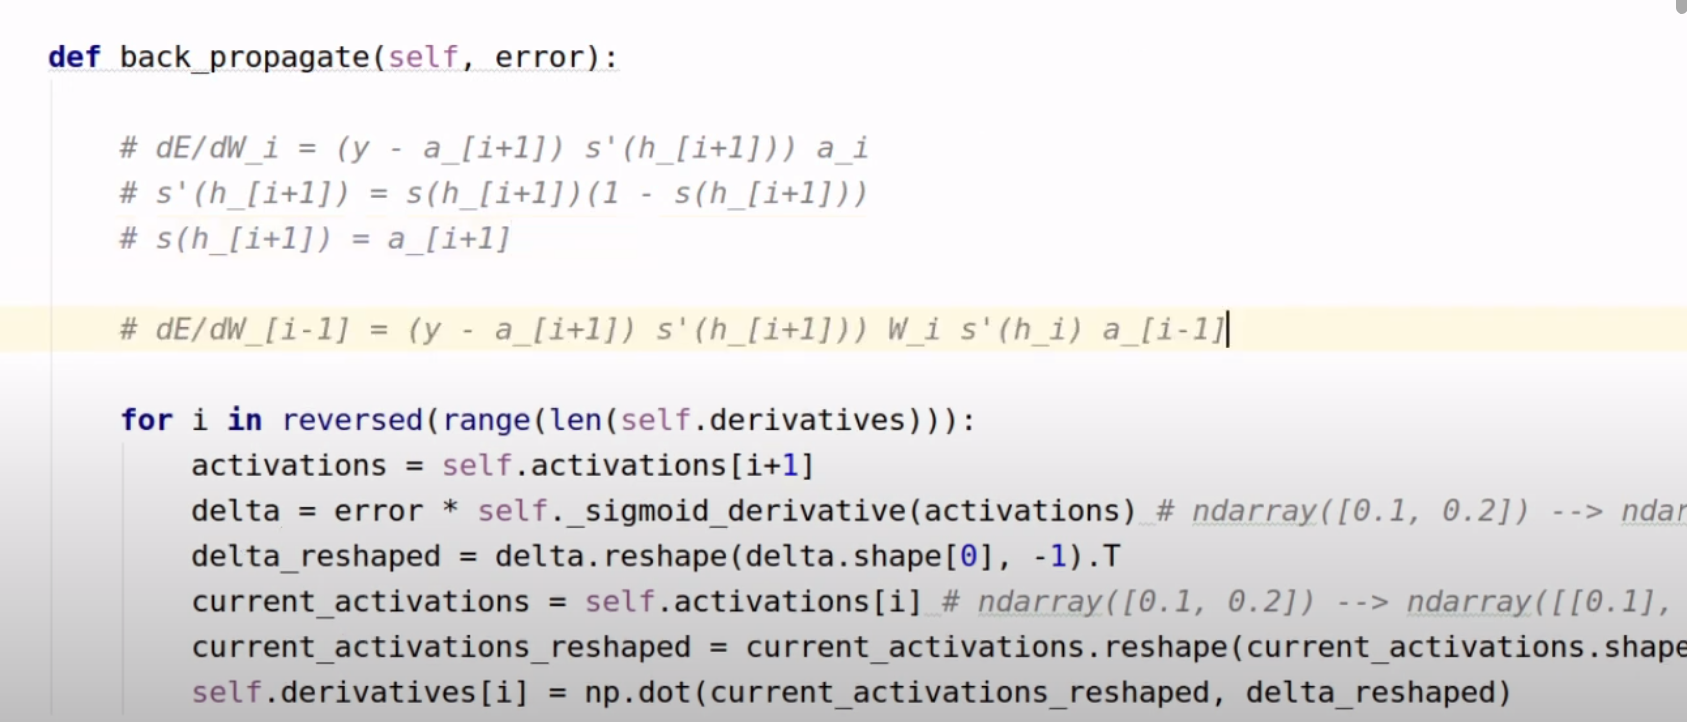

In [47]:
import numpy as np
from random import random
if __name__ == "__main__":
    # create an mlp
    mlp = MLP(2,[5],1)
    
    # create dummy data
    inputs = np.array([[random()/2 for _ in range(2)] for _ in range(2000)])
    targets = np.array([[i[0]+i[1]] for i in inputs])
    
    #train our mlp
    mlp.train(inputs,targets,50,.1)

Error: 0.042813458411279134 at epoch 0
True
Error: 0.04092794298413486 at epoch 1
True
Error: 0.040362924277690386 at epoch 2
True
Error: 0.03948956965255223 at epoch 3
True
Error: 0.038102041520256605 at epoch 4
True
Error: 0.035964445500454 at epoch 5
True
Error: 0.03286163478003466 at epoch 6
True
Error: 0.028704572810034093 at epoch 7
True
Error: 0.023677202800210104 at epoch 8
True
Error: 0.0183205185036078 at epoch 9
True
Error: 0.013364389003466834 at epoch 10
True
Error: 0.00934914040592035 at epoch 11
True
Error: 0.006414216208007211 at epoch 12
True
Error: 0.004405950161941468 at epoch 13
True
Error: 0.003079229147049377 at epoch 14
True
Error: 0.002215420858787872 at epoch 15
True
Error: 0.0016544548007864268 at epoch 16
True
Error: 0.001288789083545698 at epoch 17
True
Error: 0.001048803714542394 at epoch 18
True
Error: 0.0008900189878285025 at epoch 19
True
Error: 0.0007840499726726615 at epoch 20
True
Error: 0.0007126959806747227 at epoch 21
True
Error: 0.0006641995216908

In [38]:
input1 = np.array([0.5,0.4])

output = mlp.forward_propagate(input1)
print()
print()
print("our network belif {} + {} is equal to {}".format(input1[0],input1[1],output[0]))




our network belif 0.5 + 0.4 is equal to 0.7901763135635653
